# Problem statement:
This Project is having 2 Problems to solve.
This dataset has 14 columns and 1517 rows. we have 2 task one is to analyze the dataset and predict the claim amount and second is to predict the insurance fraud by developing a supervised machine learning model.

Part 1)In part 1 of this project we will predict the claim amount of the insurance by developing a supervised regression model.

Part 2)In part 2 of this project we will predict the insurance fraud by developing a supervised Classification model.

In [182]:
# Import all the required liabrary
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import RFE

#for part 2 of project
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [183]:
#Load Data Set
df = pd.read_csv("Auto_Insurance_Claims_amount.csv")
df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


# Analyzing the data:
Let’s start analyzing the data provided. We need to know the number of columns, rows, null objects, etc. So, let’s open the data and start counting the columns, get the row count, go through each row to find out any special characters or null values in it, find out the data type of each column provided.

In [184]:
#check the shape of data
df.shape

(9134, 26)

Dataset is having 9134 Rows and 26 columns.

In [185]:
df.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [186]:
#Check if any missing value present in data
df.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

This Data set is not having any missing values.

In [187]:
df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [188]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

Customer : ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
Country : ['US']
State Code : ['KS' 'NE' 'OK' 'MO' 'IA']
State : ['Kansas' 'Nebraska' 'Oklahoma' 'Missouri' 'Iowa']
Claim Amount : [ 276.3519279  697.9535903 1288.743165  ...  816.3890428  752.4442436
  261.1836866]
Response : ['No' 'Yes']
Coverage : ['Basic' 'Extended' 'Premium']
Education : ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Effective To Date : ['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/1

In [189]:
df.drop(["Customer","Country","State Code","Sales Channel"],axis=1,inplace=True)

In [190]:
df.head()

,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Total Claim Amount,Vehicle Class,Vehicle Size
0,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,32,5,0,1,Corporate Auto,Corporate L3,Collision,384.811147,Two-Door Car,Medsize
1,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,1131.464935,Four-Door Car,Medsize
2,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,18,38,0,2,Personal Auto,Personal L3,Collision,566.472247,Two-Door Car,Medsize
3,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,18,65,0,7,Corporate Auto,Corporate L2,Collision,529.881344,SUV,Medsize
4,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,12,44,0,1,Personal Auto,Personal L1,Collision,138.130879,Four-Door Car,Medsize


Text(0.5, 1.0, 'Total Claim Amount by State')

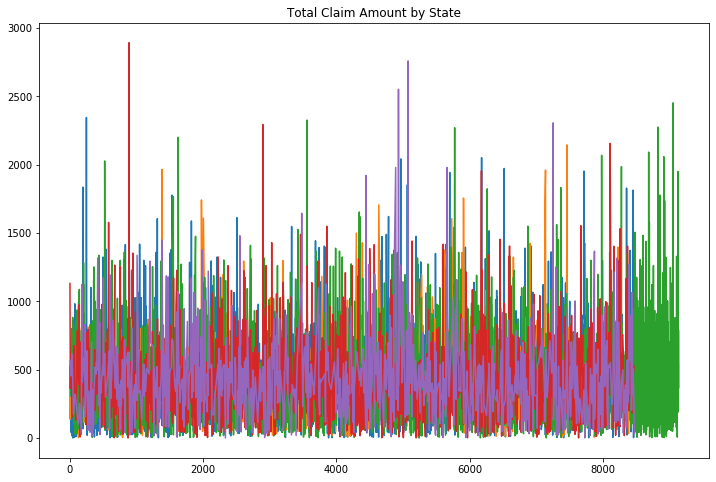

In [191]:
byState = df.groupby('State')
plt.figure(figsize=(12,8))
byState['Total Claim Amount'].plot()
plt.title('Total Claim Amount by State')

In [192]:
df.corr()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Claim Amount,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [193]:
df.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


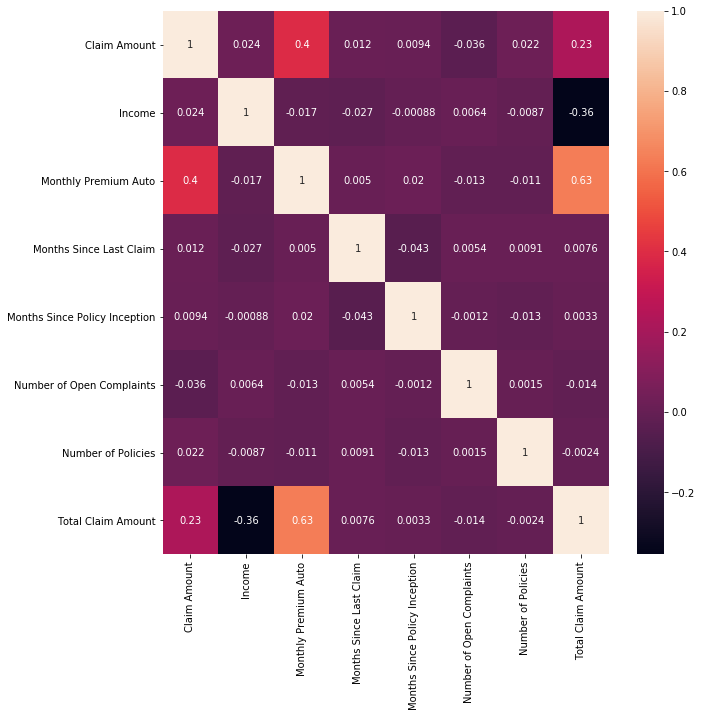

In [194]:
#Visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() , annot = True)

# Data Visualization:
Here we would try to find out a relation between each column of the final numerical dataset and the target attribute income. This can be achieved by creating a Bar graph between income and each of the other columns.

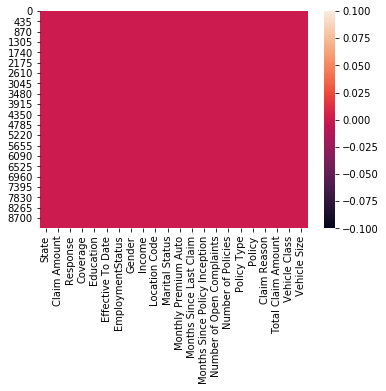

In [195]:
sns.heatmap(df.isnull())

Claim Amount                        AxesSubplot(0.125,0.657941;0.110714x0.222059)
Income                           AxesSubplot(0.257857,0.657941;0.110714x0.222059)
Monthly Premium Auto             AxesSubplot(0.390714,0.657941;0.110714x0.222059)
Months Since Last Claim          AxesSubplot(0.523571,0.657941;0.110714x0.222059)
Months Since Policy Inception    AxesSubplot(0.656429,0.657941;0.110714x0.222059)
Number of Open Complaints        AxesSubplot(0.789286,0.657941;0.110714x0.222059)
Number of Policies                  AxesSubplot(0.125,0.391471;0.110714x0.222059)
Total Claim Amount               AxesSubplot(0.257857,0.391471;0.110714x0.222059)
dtype: object

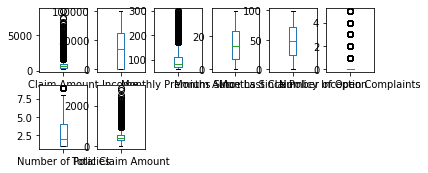

In [196]:
#check outliers
df.plot(kind='box',subplots=True,layout=(3,6))

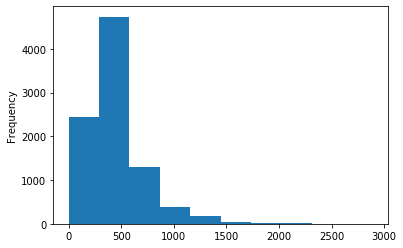

In [197]:
#Check skewness of data set
df['Total Claim Amount'].plot.hist()

data is quit bell shaped.

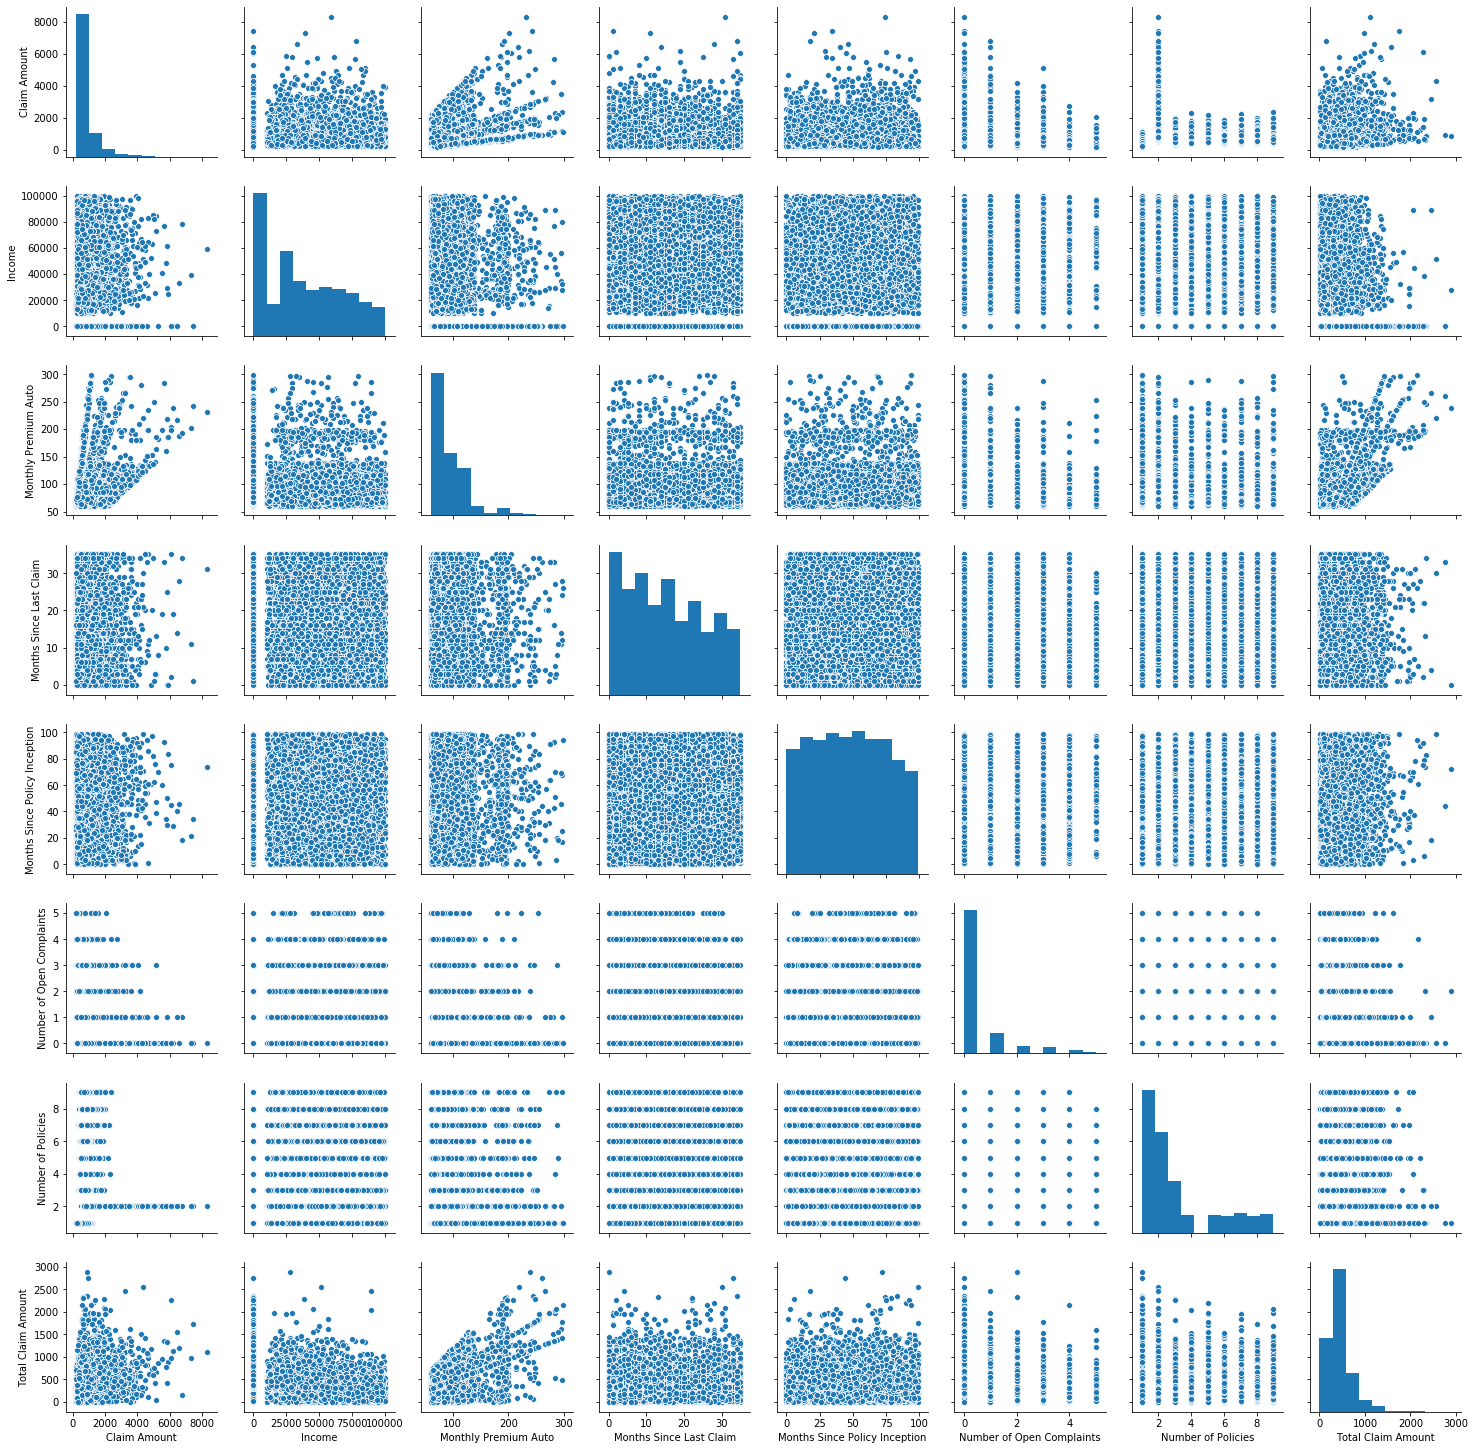

In [198]:
sns.pairplot(df)
plt.show()

# Feature Engineering:
Machine Learning model requires input data in numerical notations to extract patterns from it and make predictions. But, not all the data provided in our source dataset is numerical. the data provided in object column is Categorical data. we need to convert these into numerical notations. Here data is nothing but a feature that our model uses as an input. So, we perform Feature Engineering on our data to create meaningful numerical data out of the source dataset.

In [199]:
#check data types 
df.dtypes

State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [200]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

State : ['Kansas' 'Nebraska' 'Oklahoma' 'Missouri' 'Iowa']
Claim Amount : [ 276.3519279  697.9535903 1288.743165  ...  816.3890428  752.4442436
  261.1836866]
Response : ['No' 'Yes']
Coverage : ['Basic' 'Extended' 'Premium']
Education : ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Effective To Date : ['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11'
 '1/30/11' '2/22/11' '1/7/11']
EmploymentStatus : ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Gender : ['F' '

In [201]:
categorical_val

['State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Claim Reason',
 'Vehicle Class',
 'Vehicle Size']

In [202]:
data = pd.get_dummies(df, columns = categorical_val)

In [203]:
data.head()

,Claim Amount,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount,State_Iowa,State_Kansas,State_Missouri,...,Claim Reason_Scratch/Dent,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,276.351928,2/24/11,56274,69,32,5,384.811147,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,697.953590,1/31/11,0,94,13,42,1131.464935,0,0,0,...,1,1,0,0,0,0,0,0,1,0
2,1288.743165,2/19/11,48767,108,18,38,566.472247,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,764.586183,1/20/11,0,106,18,65,529.881344,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,281.369258,2/3/11,43836,73,12,44,138.130879,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [204]:
print(df.columns)
print(data.columns)

Index(['State', 'Claim Amount', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Claim Reason', 'Total Claim Amount', 'Vehicle Class',
       'Vehicle Size'],
      dtype='object')
Index(['Claim Amount', 'Effective To Date', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Total Claim Amount', 'State_Iowa', 'State_Kansas', 'State_Missouri',
       'State_Nebraska', 'State_Oklahoma', 'Response_No', 'Response_Yes',
       'Coverage_Basic', 'Coverage_Extended', 'Coverage_Premium',
       'Education_Bachelor', 'Education_College', 'Education_Doctor',
       'Education_High School or Below', 'Education_Master',
       'EmploymentStatus_Disabled', 'Employmen

In [205]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['Claim Amount', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception']
data[col_to_scale] = s_sc.fit_transform(data[col_to_scale])

In [206]:
data.head()

,Claim Amount,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount,State_Iowa,State_Kansas,State_Missouri,...,Claim Reason_Scratch/Dent,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,-0.762878,2/24/11,0.612827,-0.703925,1.678099,-1.543287,384.811147,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,-0.149245,1/31/11,-1.239617,0.022691,-0.208186,-0.217334,1131.464935,0,0,0,...,1,1,0,0,0,0,0,0,1,0
2,0.710636,2/19/11,0.365710,0.429596,0.288205,-0.360680,566.472247,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,-0.052263,1/20/11,-1.239617,0.371467,0.288205,0.606907,529.881344,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,-0.755575,2/3/11,0.203390,-0.587666,-0.307465,-0.145661,138.130879,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [207]:
data.drop(["Effective To Date"],axis=1,inplace=True)

In [208]:
data.head()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount,State_Iowa,State_Kansas,State_Missouri,State_Nebraska,...,Claim Reason_Scratch/Dent,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,384.811147,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,1131.464935,0,0,0,1,...,1,1,0,0,0,0,0,0,1,0
2,0.710636,0.365710,0.429596,0.288205,-0.360680,566.472247,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,529.881344,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,138.130879,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


# Model Selection for Part 1:
There are around 60+ predictive modeling algorithms that are available to choose from. We must have a good understanding of our data and the desired solution we are looking for, to narrow down our model selection. Here our goal is to predict the the average price by developing a supervised machine learning model and we want to identify a relation between our output (AveragePrice) and remaining independent features . This scenario is a classic example of Regression (Predict the average price).

We are provided with 1517 rows of the labeled dataset tagged with the output column “AveragePrice” to train our model. Whenever the dataset is labeled and output feature is known, we opt for the Supervised Learning Machine Learning technique. So, our use-case is a Supervised Learning plus Regression problem. Based on these criteria we can narrow down our choice of models to a few:

Linear Regression

DecisionTreeRegressor()

RandomForestRegressor()


# Identifying features:
Here we are dividing our data into a dependent feature that is object as y and independent features as x.

In [209]:
y = data["Total Claim Amount"]
x = data.drop("Total Claim Amount",axis=1)


In [210]:
x.shape

(9134, 73)

In [211]:
y.shape

(9134,)

# Splitting Data:
we split our data into a test set and train set using train_test_split() which helps to better train the model and test its performance. test_size=0.15 creates a test data set with 15% of the data we have and the remaining 85% percent will be our training set to train our model. This split function returns us a pair of the train set (x_train,y_train) and a pair of the test set (x_test,y_test).

In [212]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = .15 , random_state = 40)


In [213]:
model = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print('error')
    print('mae',mean_absolute_error(y_test,predm))
    print('mse',mean_squared_error(y_test,predm))
    print('rmse',np.sqrt(mean_squared_error(y_test,predm)))
    print('score',r2_score(y_test,predm))
    print('\n')

error
mae 95.80054943859408
mse 18317.56951453132
rmse 135.34241579981983
score 0.7781275163800245


error
mae 85.2401165010941
mse 20736.955842984284
rmse 144.00331886100503
score 0.7488225775831916


error
mae 72.18733803306102
mse 12289.986821081264
rmse 110.86021297598731
score 0.8511369154359212




# we can observe that Random Forest Regressor algorithem worked very well.
Accuracy score of both algorithems are as given:-

Accuracy score of Linear Regression is 77%

Accuracy score of DecisionTreeRegressor() is 74%

Accuracy score of RandomForestRegressor() is 85%

Hence we can say that out all algorithems RandomForestRegressor() is best for this problem till now however we will use cross validation to select best model.

In [214]:
lm =RandomForestRegressor()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)
pred= lm.predict(x_test)
print("predicted value",pred)
print("actual value",y_test)
print('error')
print('mae',mean_absolute_error(y_test,pred))
print('mse',mean_squared_error(y_test,pred))
print('rmse',np.sqrt(mean_squared_error(y_test,pred)))
print('score',r2_score(y_test,predm))

predicted value [578.04522319 420.75210428 538.79198232 ... 527.13206931 161.2463095
 576.05633423]
actual value 554     451.200000
1825    355.200000
218     537.600000
7261    274.114843
3858    302.400000
           ...    
7892    350.400000
5347    419.921897
210     470.400000
2520    158.077504
6936    513.600000
Name: Total Claim Amount, Length: 1371, dtype: float64
error
mae 71.97713773340385
mse 12140.56851317217
rmse 110.18424802653131
score 0.8511369154359212


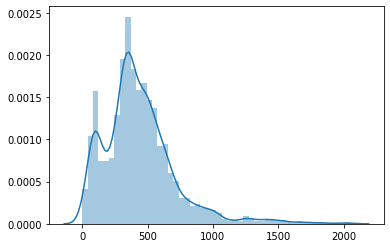

In [215]:
sns.distplot((y_test,pred),bins=50)

## Model Validation

In [216]:
clf = RandomForestRegressor()

scores = cross_val_score(clf,x,y,cv=5,scoring='r2')
scores.mean()

0.8416285231613487

# Save the model using Pickle

In [222]:
# Save the model using pickle
import pickle

filename = "pickleRFRfile.pkl"
pickle.dump(clf, open(filename, 'wb'))


# Conclusion of Part 1:
we achieved highest accuracy score of 84% by using Random Forest Regressor which is good for any machine learning prediction model particularly for a linear regression problem. Finally! we successfully created a Regression Machine Learning prediction model using Python and its powerful libraries which predicts the claim amount for insurance.

# Part 2:-

In [141]:
#Load Data Set
df = pd.read_csv("Automobile_insurance_fraud.csv")
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


# Analyzing the data:
Let’s start analyzing the data provided. We need to know the number of columns, rows, null objects, etc. So, let’s open the data and start counting the columns, get the row count, go through each row to find out any special characters or null values in it, find out the data type of each column provided.

In [142]:
#check the shape of data
df.shape

(1000, 40)

In [143]:
#Check if any missing value present in data
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [144]:
#Check the data types
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [145]:
#Check if any missing value present in data
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

based on randomness and uniqueness we have drop some columns.

In [146]:
df.drop(['_c39','age','incident_date','insured_hobbies','capital-gains','capital-loss','auto_make',
         'auto_model','auto_year','policy_bind_date','policy_number','insured_zip','incident_location',
         'incident_hour_of_the_day'],axis=1,inplace=True)

In [147]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 50:
        categorical_val.append(column)
    else:
        continous_val.append(column)

months_as_customer : [328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 291 162 3

In [148]:
categorical_val

['policy_state',
 'policy_csl',
 'policy_deductable',
 'umbrella_limit',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'fraud_reported']

In [149]:
categorical_val.remove('fraud_reported')
data = pd.get_dummies(df, columns = categorical_val)

In [150]:
data.head()

,months_as_customer,policy_annual_premium,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,policy_state_IL,policy_state_IN,policy_state_OH,...,bodily_injuries_0,bodily_injuries_1,bodily_injuries_2,witnesses_0,witnesses_1,witnesses_2,witnesses_3,police_report_available_?,police_report_available_NO,police_report_available_YES
0,328,1406.91,71610,6510,13020,52080,Y,0,0,1,...,0,1,0,0,0,1,0,0,0,1
1,228,1197.22,5070,780,780,3510,Y,0,1,0,...,1,0,0,1,0,0,0,1,0,0
2,134,1413.14,34650,7700,3850,23100,N,0,0,1,...,0,0,1,0,0,0,1,0,1,0
3,256,1415.74,63400,6340,6340,50720,Y,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4,228,1583.91,6500,1300,650,4550,N,1,0,0,...,1,0,0,0,1,0,0,0,1,0


In [151]:
continous_val

['months_as_customer',
 'policy_annual_premium',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim']

In [103]:
#Check if any missing value present in data
df.isnull().sum()

months_as_customer               0
age                              0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
dtype: int64

In [152]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['months_as_customer','policy_annual_premium','total_claim_amount','injury_claim','property_claim',
                'vehicle_claim']
data[col_to_scale] = s_sc.fit_transform(data[col_to_scale])

In [153]:
data.head()

,months_as_customer,policy_annual_premium,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,policy_state_IL,policy_state_IN,policy_state_OH,...,bodily_injuries_0,bodily_injuries_1,bodily_injuries_2,witnesses_0,witnesses_1,witnesses_2,witnesses_3,police_report_available_?,police_report_available_NO,police_report_available_YES
0,1.078140,0.616705,0.714257,-0.189283,1.165505,0.749653,Y,0,0,1,...,0,1,0,0,0,1,0,0,0,1
1,0.208995,-0.242521,-1.807312,-1.363822,-1.372696,-1.823346,Y,0,1,0,...,1,0,0,1,0,0,0,1,0,0
2,-0.608002,0.642233,-0.686362,0.054644,-0.736072,-0.785565,N,0,0,1,...,0,0,1,0,0,0,1,0,1,0
3,0.452355,0.652886,0.403135,-0.224130,-0.219722,0.677607,Y,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0.208995,1.341980,-1.753121,-1.257232,-1.399654,-1.768252,N,1,0,0,...,1,0,0,0,1,0,0,0,1,0


# Feature Engineering:
Machine Learning model requires input data in numerical notations to extract patterns from it and make predictions. But, not all the data provided in our source dataset is numerical. the data provided in all column is Categorical data. we need to convert these into numerical notations. Here data is nothing but a feature that our model uses as an input. So, we perform Feature Engineering on our data to create meaningful numerical data out of the source dataset.

In [154]:
#Encode the categorical data values
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['fraud_reported'] = label.fit_transform(data['fraud_reported'].values)
data.head()

,months_as_customer,policy_annual_premium,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported,policy_state_IL,policy_state_IN,policy_state_OH,...,bodily_injuries_0,bodily_injuries_1,bodily_injuries_2,witnesses_0,witnesses_1,witnesses_2,witnesses_3,police_report_available_?,police_report_available_NO,police_report_available_YES
0,1.078140,0.616705,0.714257,-0.189283,1.165505,0.749653,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
1,0.208995,-0.242521,-1.807312,-1.363822,-1.372696,-1.823346,1,0,1,0,...,1,0,0,1,0,0,0,1,0,0
2,-0.608002,0.642233,-0.686362,0.054644,-0.736072,-0.785565,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
3,0.452355,0.652886,0.403135,-0.224130,-0.219722,0.677607,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0.208995,1.341980,-1.753121,-1.257232,-1.399654,-1.768252,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0


# Model Selection for Part 2:
There are around 60+ predictive modeling algorithms that are available to choose from. We must have a good understanding of our data and the desired solution we are looking for, to narrow down our model selection. Here our goal is to predict the  the city/region of observation developing a supervised machine learning model and we want to identify a relation between our output (Region) and remaining independent features . This scenario is a classic example of classification (Predict the city).

We are provided with 1517 rows of the labeled dataset tagged with the output column “region” to train our model. Whenever the dataset is labeled and output feature is known, we opt for the Supervised Learning Machine Learning technique. So, our use-case is a Supervised Learning plus classification problem. Based on these criteria we can narrow down our choice of models to a few:

Logistic Regression

KNN or k-Nearest Neighbors

Support Vector Machines

Decision Tree

# Identifying features:
Here we are dividing our data into a dependent feature that is object as y and independent features as x.

In [155]:
y = data.fraud_reported	
x = data.drop('fraud_reported',axis=1)

In [156]:
x.shape

(1000, 103)

In [157]:
y.shape

(1000,)

# Splitting Data:
we split our data into a test set and train set using train_test_split() which helps to better train the model and test its performance. test_size=0.15 creates a test data set with 15% of the data we have and the remaining 85% percent will be our training set to train our model. This split function returns us a pair of the train set (x_train,y_train) and a pair of the test set (x_test,y_test).

In [158]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = .15 , random_state = 44)

In [159]:
model = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=5)]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print('accuaracy score of',accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuaracy score of 0.78
[[98 17]
 [16 19]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       115
           1       0.53      0.54      0.54        35

    accuracy                           0.78       150
   macro avg       0.69      0.70      0.70       150
weighted avg       0.78      0.78      0.78       150



accuaracy score of 0.7533333333333333
[[92 23]
 [14 21]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       115
           1       0.48      0.60      0.53        35

    accuracy                           0.75       150
   macro avg       0.67      0.70      0.68       150
weighted avg       0.78      0.75      0.76       150



accuaracy score of 0.6466666666666666
[[86 29]
 [24 11]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       115
           1       0.28      0.31      0.29        35

    accuracy         

#  we can observe that Decision Tree Classifier() algorithem worked very well.

Accuracy score of all algorithems are as given:-

Accuracy score of Logistic Regression is 31%

Accuracy score of SVC is 19%

Accuracy score of Decision Tree Classifier is 81%

Accuracy score of K Neighbors Classifier is 80%

Hence we can say that out all algorithems Decision Tree Classifier and K Neighbors Classifier are working good for this problem till now. we Decision Tree Classifier to build our model.

# Model Validation

In [160]:
log=LogisticRegression()
log.fit(x_train,y_train)
log.score(x_train,y_train)
pred = log.predict(x_test)
print('accuaracy score of',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print('\n')

accuaracy score of 0.78
[[98 17]
 [16 19]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       115
           1       0.53      0.54      0.54        35

    accuracy                           0.78       150
   macro avg       0.69      0.70      0.70       150
weighted avg       0.78      0.78      0.78       150





In [161]:
clf = LogisticRegression()

scores = cross_val_score(clf,x,y,cv=5,scoring='accuracy')
scores

array([0.8  , 0.775, 0.765, 0.81 , 0.795])

In [162]:
# number of features in X_train
x_train.shape

(850, 103)

In [163]:

#specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 102))}]


#grid search
#specify model
lm = LogisticRegression()
lm.fit(x_train, y_train)
rfe = RFE(lm)             

#call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe,param_grid = hyper_params,scoring= 'accuracy',cv = 5,verbose = 1,return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train)  

Fitting 5 folds for each of 101 candidates, totalling 505 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 505 out of 505 | elapsed: 11.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RFE(estimator=LogisticRegression(C=1.0,
                                                        class_weight=None,
                                                        dual=False,
                                                        fit_intercept=True,
                                                        intercept_scaling=1,
                                                        l1_ratio=None,
                                                        max_iter=100,
                                                        multi_class='auto',
                                                        n_jobs=None,
                                                        penalty='l2',
                                                        random_state=None,
                                                        solver='lbfgs',
                                                        tol=0.0001, verbose=0,
                       

In [164]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.570529,0.331511,0.001989,0.000013,1,{'n_features_to_select': 1},0.805882,0.800000,0.811765,0.858824,...,0.821176,0.021242,1,0.825000,0.826471,0.823529,0.811765,0.819118,0.821176,0.005310
1,2.113552,0.130880,0.001994,0.000630,2,{'n_features_to_select': 2},0.805882,0.800000,0.811765,0.858824,...,0.821176,0.021242,1,0.825000,0.826471,0.823529,0.811765,0.819118,0.821176,0.005310
2,2.171995,0.060173,0.001795,0.000400,3,{'n_features_to_select': 3},0.805882,0.800000,0.811765,0.858824,...,0.821176,0.021242,1,0.825000,0.826471,0.823529,0.811765,0.819118,0.821176,0.005310
3,2.136689,0.115364,0.002393,0.000798,4,{'n_features_to_select': 4},0.805882,0.800000,0.811765,0.858824,...,0.821176,0.021242,1,0.825000,0.826471,0.823529,0.811765,0.819118,0.821176,0.005310
4,2.046929,0.102741,0.001996,0.000631,5,{'n_features_to_select': 5},0.805882,0.764706,0.811765,0.858824,...,0.814118,0.030814,5,0.825000,0.829412,0.823529,0.811765,0.819118,0.821765,0.005984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.216017,0.016591,0.002394,0.000489,97,{'n_features_to_select': 97},0.794118,0.752941,0.770588,0.788235,...,0.780000,0.016045,43,0.832353,0.839706,0.832353,0.826471,0.838235,0.833824,0.004743
97,0.176128,0.005061,0.001795,0.000400,98,{'n_features_to_select': 98},0.794118,0.752941,0.770588,0.788235,...,0.780000,0.016045,43,0.832353,0.839706,0.832353,0.826471,0.838235,0.833824,0.004743
98,0.152391,0.011483,0.001595,0.000489,99,{'n_features_to_select': 99},0.794118,0.752941,0.770588,0.788235,...,0.780000,0.016045,43,0.832353,0.839706,0.832353,0.826471,0.838235,0.833824,0.004743
99,0.117686,0.004138,0.001795,0.000399,100,{'n_features_to_select': 100},0.794118,0.752941,0.770588,0.788235,...,0.780000,0.016045,43,0.832353,0.839706,0.832353,0.826471,0.838235,0.833824,0.004743


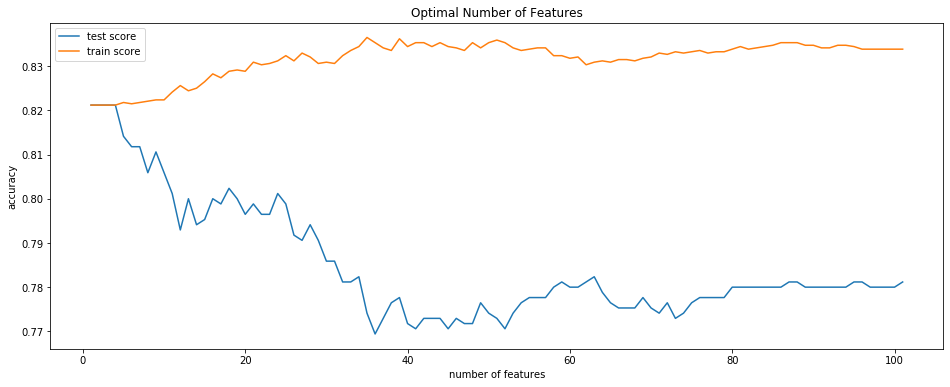

In [165]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('accuracy')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

# Now we can choose the optimal value of number of features and build a final model.

In [178]:
# final model
n_features_optimal = 40

lm =  LogisticRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(x_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(x_test)
score = accuracy_score(y_test, y_pred)
print(score)

0.7866666666666666


# Save the model using Pickle

In [179]:
# Save the model using pickle
import pickle

filename = "pickleDTCfile.pkl"
pickle.dump(rfe, open(filename, 'wb'))


# Conclusion of Part 2:
we achieved highest accuracy score of 78% by using LogisticRegression() which is good for any machine learning prediction model particularly for a classification problem. Finally! we successfully created a classification Machine Learning prediction model using Python and its powerful libraries which predicts the Fraud insurance claim.